In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict

from EEGNet import EEGNet
from run_model import run, draw_figure

In [3]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32)
train_label = torch.from_numpy(train_label).type(torch.long)
test_data   = torch.from_numpy(test_data).type(torch.float32)
test_label  = torch.from_numpy(test_label).type(torch.long)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


# Run Model

In [12]:

line_list = []
#label_list = ['elu_train','elu_test','leaky_relu_train','leaky_relu_test','relu_train','relu_test']
label_list = ['leaky_relu_train','leaky_relu_test']
'''
# ELU
net = EEGNet().to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''
# Leaky_relu
net = EEGNet(act_f='leakyrelu',hyper=6).to(device)
optimizer = optim.SGD(net.parameters(),lr=1e-2, weight_decay=5e-2,momentum=0.9)
lr_sch = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
#optimizer = optim.Adagrad(net.parameters(),lr=1e-4,lr_decay=0.8,weight_decay=5e-3)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label,\
                                               optimizer = optimizer, scheduler=lr_sch, num_epochs = 300, batch_size = 64,\
                                               print_freq = 50)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''
# Relu
net = EEGNet(act_f='relu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               ,num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''

epoch  50  : loss =  1.238847330212593
Train acc =  100.0
Test acc =  87.96296296296296
epoch  100  : loss =  1.0548826940357685
Train acc =  100.0
Test acc =  87.87037037037037
epoch  150  : loss =  0.9822373017668724
Train acc =  100.0
Test acc =  87.77777777777777
epoch  200  : loss =  1.0075493343174458
Train acc =  100.0
Test acc =  87.96296296296296
epoch  250  : loss =  1.0012126490473747
Train acc =  100.0
Test acc =  87.77777777777777
epoch  300  : loss =  0.9903198964893818
Train acc =  100.0
Test acc =  88.14814814814815


"\n# Relu\nnet = EEGNet(act_f='relu').to(device)\nloss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label                                               ,num_epochs = 300, batch_size = 64, print_freq = 301)\nline_list.append(acc_train_list)\nline_list.append(acc_test_list)\n"

# Draw loss & accuracy figures

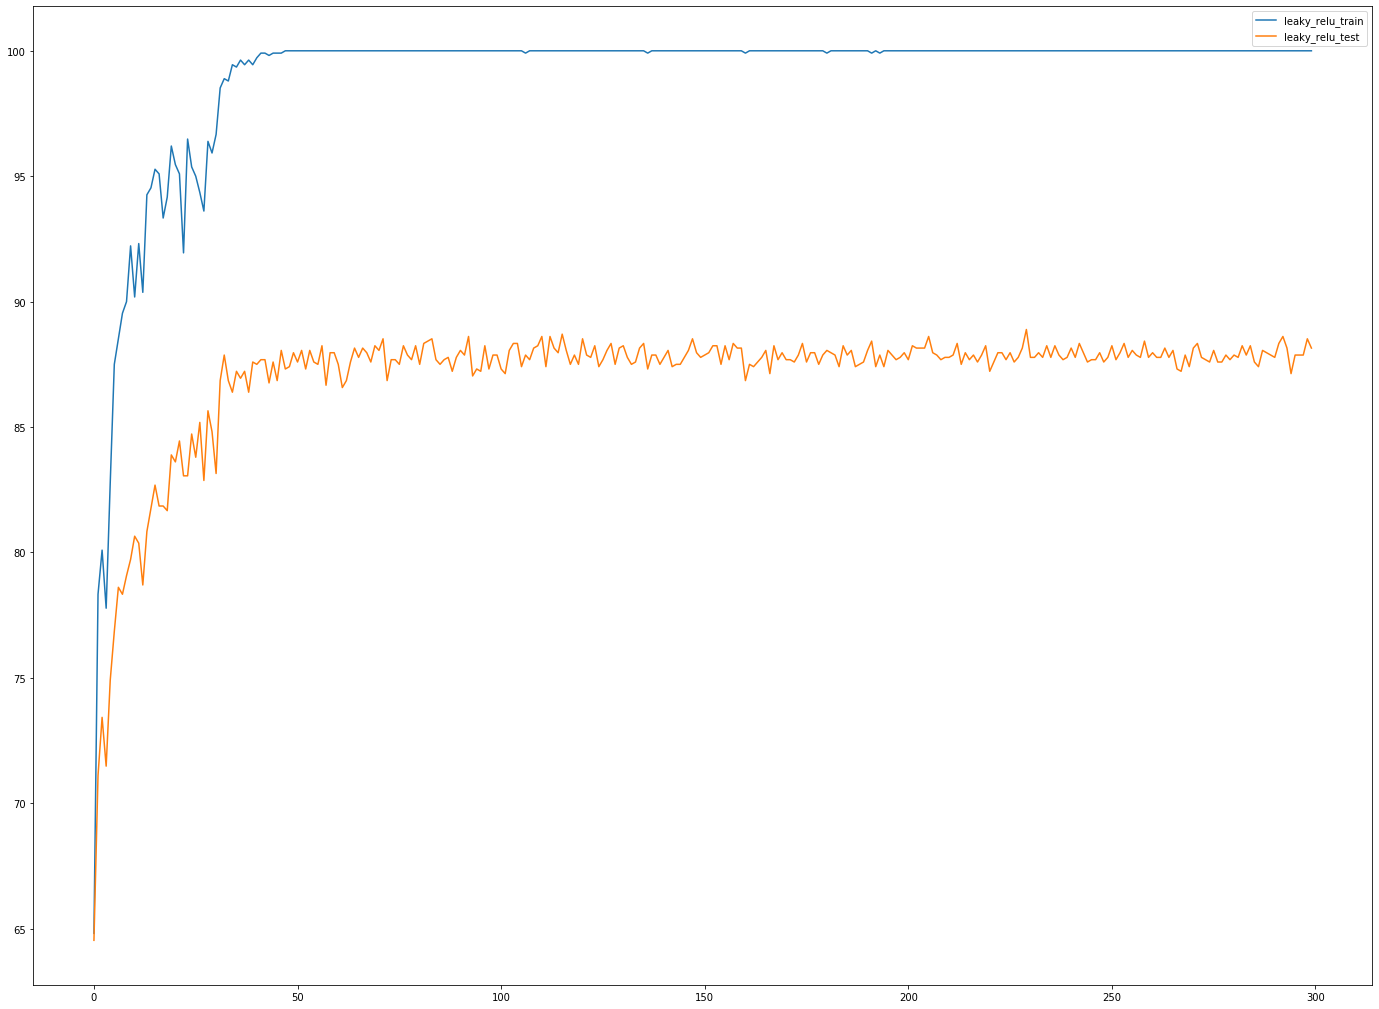

Test Accuracy =  88.14814814814815


In [13]:
plt.figure(figsize=[24,18])
draw_figure(plt,line_list,label_list, loc='best')
print('Test Accuracy = ',line_list[-1][-1])

In [ ]:
plt.figure(figsize=[24,18])
draw_figure(plt,[loss_list])